In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Задача: построить и описать модель, где целевой переменной (таргетом) являются помесячные изменения объемов рынка вкладов физических лиц РФ в рублях, которая будет объяснима с точки зрения экономической логики. Дополнительно требуется построить прогноз таргета на 01.2017 – 12.2017.

Данные: в файле xls представлены данные по изменениям объемов вкладов физических лиц в рублях в РФ, а также ставки по продукту, связанным с ним продуктам и макроэкономические показатели. В качестве объясняющих факторов можно использовать как показатели, представленные в базе, так и самостоятельно найденные показатели (например, на сайте Росстата или ЦБ). 

Модель: оценивание можно проводить с помощью любых моделей (методов и алгоритмов), однако, они должны показывать, как хорошее качество с точки зрения описания взаимосвязей, так и высокую предсказательную силу на будущий период. Так же модель должна давать согласующиеся с экономической логикой зависимости.

Формат отчета: Моделирование можно делать в любом статистическом пакете или среде программирования. На выходе нужно предоставить jupyter_notebook / rmarkdown / аналог с понятным описанием логики построения модели и интерпретацией результатов или аналог в doc / ppt / pdf / html


In [64]:
df = pd.read_excel('BST/BST_DataSet.xlsx').rename(columns = 
                                                  {'Unnamed: 0' : 'Дата'})


***************************************************************************************************************************
Индекс потребительских цен (ИПЦ, индекс инфляции, англ. Consumer Price Index, CPI) — один из видов индексов цен, созданный для измерения среднего уровня изменения цен на товары и услуги (потребительской корзины) за определённый период в экономике.
***************************************************************************************************************************
Ключевая ставка — это минимальный процент, под который коммерческие банки берут кредиты у ЦБ.
***************************************************************************************************************************
Облигации федерального займа для населения (ОФЗ-н) — это ценные бумаги, которые выпускает Министерство финансов РФ специально для распространения среди обычных граждан: их проще купить, чем рыночные облигации, а риски ограничены.
***************************************************************************************************************************
М0 = наличные деньги в обращении (монеты, банкноты). \
М1 = М0 + чеки, вклады до востребования (в том числе банковские дебетовые карты), остатки средств в национальной валюте на расчётных счетах организаций, текущих и иных счетах до востребования населения, нефинансовых и финансовых (кроме кредитных) организаций.\
М2 = М1 + срочные вклады.
***************************************************************************************************************************


In [3]:
df.head()

,Дата,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
0,2011-01-01,-79049.0,5.244667,7.75,2.9,4.5,96.29,106.17151,5532900.0,19307.7,30.08,20669
1,2011-02-01,180475.0,5.144211,8.00,3.1,4.4,103.96,106.99964,5613700.0,19536.7,29.29,20680
2,2011-03-01,106845.0,5.021364,8.00,3.1,4.2,114.44,107.66304,5647000.0,19788.7,28.43,22673
3,2011-04-01,224890.0,4.558571,8.00,2.6,4.1,123.15,108.12599,5863400.0,20020.8,28.10,22519
4,2011-05-01,45856.0,4.795000,8.25,2.6,4.1,114.46,108.64500,5893400.0,20160.9,27.87,22779


In [4]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Дата                                               84 non-null     datetime64[ns]
 1   Прирост вкладов физических лиц в рублях (млн руб)  72 non-null     float64       
 2   Доходность ОФЗ по сроку до 1 года                  84 non-null     float64       
 3   Ключевая ставка                                    84 non-null     float64       
 4   Ставка по вкладам в долларах до 1 года             84 non-null     float64       
 5   Ставка по вкладам в рублях до 1 года               84 non-null     float64       
 6   Нефть марки Юралс, долл./барр                      84 non-null     float64       
 7   Индекс потребительских цен, ед.                    84 non-null     float64       
 8   М0, руб               

In [5]:
df.describe()

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
count,7.200000e+01,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,8.400000e+01,84.000000,84.000000,84.000000
mean,1.466405e+05,7.875670,9.130952,2.184643,6.233929,83.118095,136.725747,7.806555e+06,30105.740071,45.288690,31877.130952
std,2.593857e+05,2.195040,2.214233,1.108624,1.733394,30.069987,22.413867,9.703699e+05,6038.007629,15.539177,6029.179510
min,-5.674480e+05,4.558571,5.500000,0.520000,4.000000,30.800000,106.171510,5.532900e+06,19307.700000,27.870000,20669.000000
25%,1.949025e+04,6.228064,8.000000,1.510000,5.292500,51.992500,116.118345,7.139175e+06,24456.950000,31.345000,26830.750000
50%,1.129245e+05,7.475455,8.250000,2.230000,5.755000,99.630000,131.183355,7.959500e+06,30155.450000,35.885000,32355.500000
75%,2.360528e+05,9.332238,10.125000,2.900000,6.657500,110.185000,160.386900,8.462600e+06,35124.050000,59.742500,35772.500000
max,1.034556e+06,15.098421,17.000000,5.220000,12.330000,124.930000,169.560950,9.974472e+06,42372.101217,77.220000,50500.000000


### Разделим наши данные на два датасета - на с известным целевым таргетом и не известным.

In [65]:
train_df = df[~np.isnan(df['Прирост вкладов физических лиц в рублях (млн руб)'])]
train_df.head()

,Дата,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
0,2011-01-01,-79049.0,5.244667,7.75,2.9,4.5,96.29,106.17151,5532900.0,19307.7,30.08,20669
1,2011-02-01,180475.0,5.144211,8.00,3.1,4.4,103.96,106.99964,5613700.0,19536.7,29.29,20680
2,2011-03-01,106845.0,5.021364,8.00,3.1,4.2,114.44,107.66304,5647000.0,19788.7,28.43,22673
3,2011-04-01,224890.0,4.558571,8.00,2.6,4.1,123.15,108.12599,5863400.0,20020.8,28.10,22519
4,2011-05-01,45856.0,4.795000,8.25,2.6,4.1,114.46,108.64500,5893400.0,20160.9,27.87,22779


In [66]:
test_df = df[np.isnan(df['Прирост вкладов физических лиц в рублях (млн руб)'])]
test_df.head()

,Дата,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
72,2017-01-01,NaN,8.416190,10.00,0.79,6.50,54.89,166.434720,8.628900e+06,38016.800000,59.96,34422
73,2017-02-01,NaN,8.830526,10.00,0.77,6.30,55.49,166.800870,8.711600e+06,38475.200000,58.39,35497
74,2017-03-01,NaN,8.987727,9.75,0.80,5.91,51.97,167.017720,8.697700e+06,38555.200000,58.10,37899
75,2017-04-01,NaN,8.655263,9.75,0.52,6.25,53.06,167.568870,8.936600e+06,38663.800000,56.43,39225
76,2017-05-01,NaN,8.319500,9.25,0.76,6.10,50.87,168.188880,8.907000e+06,39222.900000,57.17,39679
77,2017-06-01,NaN,8.039048,9.00,0.71,5.70,46.89,169.214830,9.066500e+06,39623.100000,57.82,41454
78,2017-07-01,NaN,8.074286,9.00,0.66,6.07,48.50,169.333280,9.174300e+06,39275.900000,59.67,38073
79,2017-08-01,NaN,7.882174,9.00,0.73,6.07,52.00,168.418880,9.194600e+06,39419.300000,59.65,37099
80,2017-09-01,NaN,7.648095,8.50,0.66,5.31,57.00,168.166250,9.225200e+06,39571.000000,57.73,38047
81,2017-10-01,NaN,7.503636,8.25,0.61,5.67,57.50,168.502590,9.246600e+06,39565.982237,57.71,38333


### Проверим данные на соотвествие

1) Линейность, собственно. Увеличение, или уменьшение вектора независимых переменных в k раз, приводит к изменению зависимой переменной также в k раз.

2) Матрица коэффициентов обладает полным рангом, то есть векторы независимых переменных линейно независимы. 

3) Нормальное распределение. Линейная регрессия сделает более надежные прогнозы, если ваши входные и выходные данные имеют нормальное распределение.

4) Экзогенность независимых переменных — $E[\epsilon_i|x_{j1}, x_{j2}, ... x_{jk}] = 0$. Это требование означает, что математическое ожидание погрешности никоим образом нельзя объяснить с помощью независимых переменных.

5) Однородность дисперсии и отсутствие автокорреляции. Каждая εi обладает одинаковой и конечной дисперсией σ2 и не коррелирует с другой εi. Это ощутимо ограничивает применимость модели линейной регрессии, необходимо удостовериться в том, что условия соблюдены, иначе обнаруженная взаимосвязь переменных будет неверно интерпретирована.

6) Гауссовские распределения. Линейная регрессия сделает более надежные прогнозы, если ваши входные и выходные переменные имеют гауссовское распределение. Вы можете получить некоторую выгоду, используя преобразования (например, log или BoxCox) для ваших переменных, чтобы их распределение выглядело более гауссово.

##### Проверим линейную взаимосвязь между X и Y ,  и распределение X

In [8]:
# Данная функция будет выводить два граффика: 
# Scatter plot для целевой переменной и X
# График распределения для X
def Scatter_plot(x):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.scatterplot(ax = axes[0],
                        x = x, 
                        y = 'Прирост вкладов физических лиц в рублях (млн руб)', 
                        data = train_df);
    sns.distplot(ax = axes[1],
             a = train_df[x]);
    print('Coef_corr = ', np.corrcoef(x=train_df[x], y= train_df['Прирост вкладов физических лиц в рублях (млн руб)'])[1,0])

Coef_corr =  0.0018287984566497841


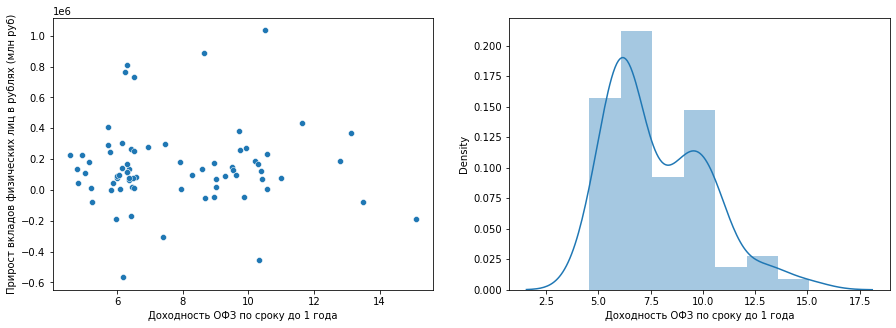

In [9]:
Scatter_plot('Доходность ОФЗ по сроку до 1 года')

Coef_corr =  0.04894577331196063


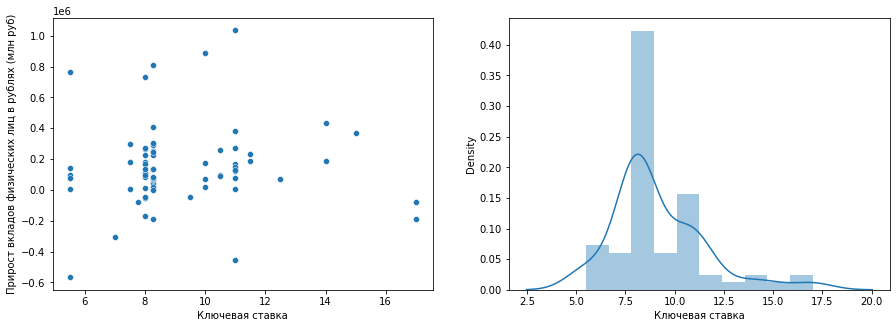

In [10]:
Scatter_plot('Ключевая ставка')

Coef_corr =  -0.012822900057456439


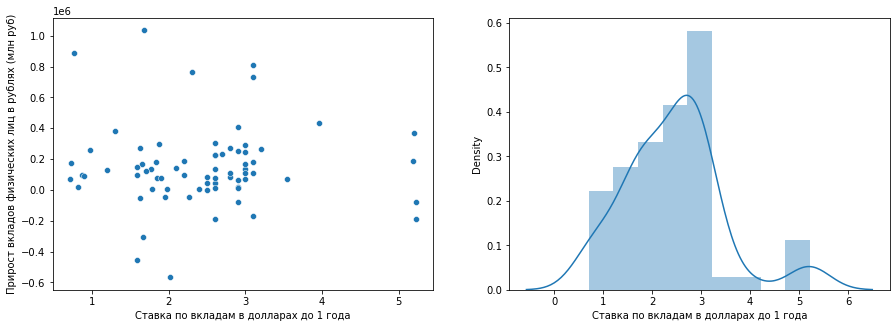

In [11]:
Scatter_plot('Ставка по вкладам в долларах до 1 года')

Coef_corr =  0.05398919439518859


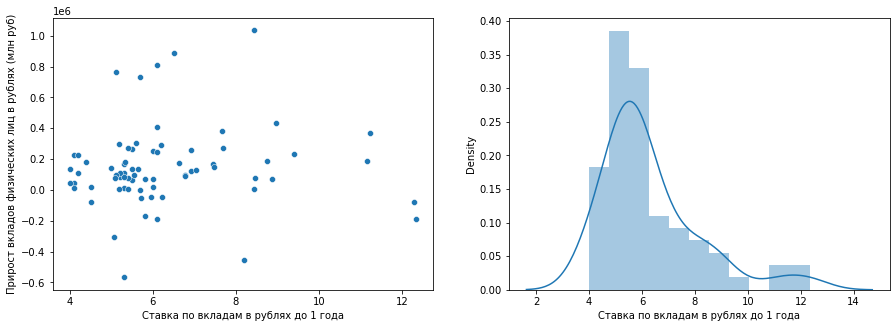

In [12]:
Scatter_plot('Ставка по вкладам в рублях до\xa01\xa0года')

Coef_corr =  -0.0770736486493974


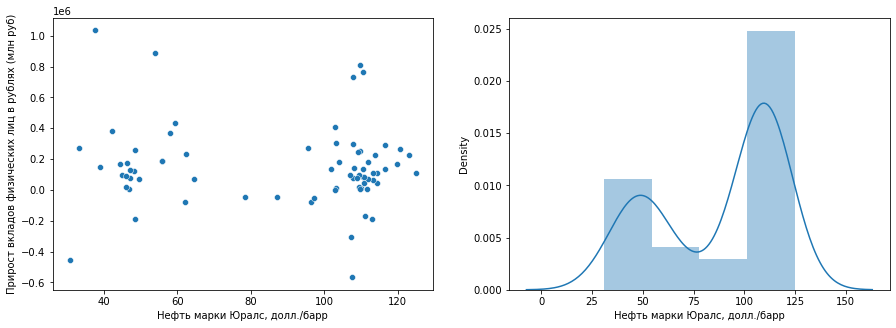

In [13]:
Scatter_plot('Нефть марки Юралс, долл./барр')

Coef_corr =  0.09869351988162506


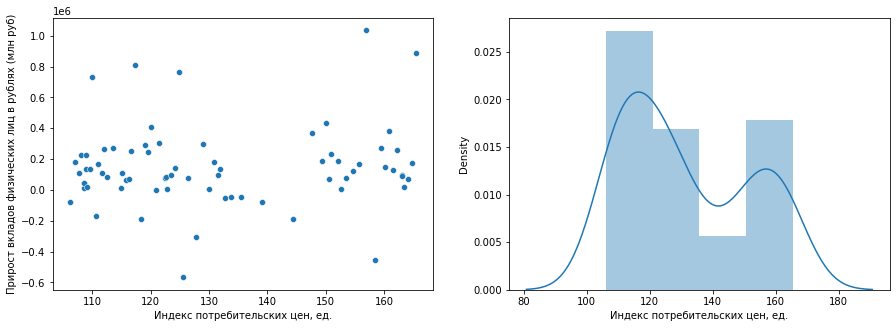

In [14]:
Scatter_plot('Индекс потребительских цен, ед.')

Coef_corr =  0.16095642813644045


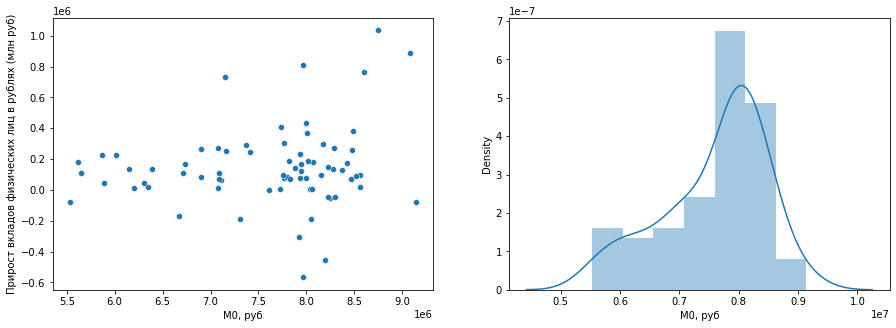

In [15]:
Scatter_plot('М0, руб')

Coef_corr =  0.13508587949948628


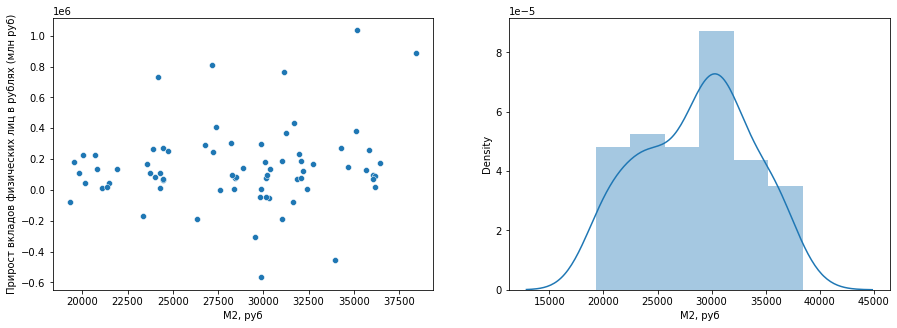

In [16]:
Scatter_plot('М2, руб')

Coef_corr =  0.0773813091431338


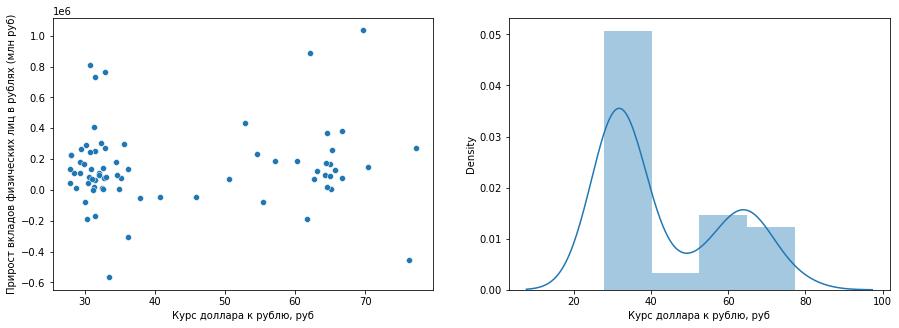

In [17]:
Scatter_plot('Курс доллара к рублю, руб')

Coef_corr =  0.40529075085317356


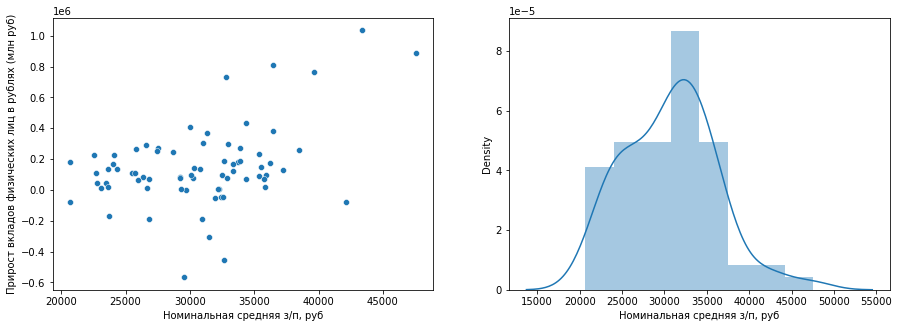

In [18]:
Scatter_plot('Номинальная средняя з/п, руб')

В данном пункте все очень плохо. Линейная зависимость между зависимой перемнной и независимыми переменными отсуствует.
Независимые переменные не имеют нормального распределения.

#### Проверим мультколлинеарность между независимыми переменными

In [296]:
train_df.drop(columns = 'Прирост вкладов физических лиц в рублях (млн руб)').corr()

,Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
Доходность ОФЗ по сроку до 1 года,1.000000,0.868058,0.104107,0.914757,-0.830436,0.798182,0.667395,0.720301,0.833531,0.651659
Ключевая ставка,0.868058,1.000000,0.345412,0.900468,-0.744765,0.617396,0.368487,0.460178,0.721729,0.439797
Ставка по вкладам в долларах до 1 года,0.104107,0.345412,1.000000,0.365788,0.274273,-0.431177,-0.359658,-0.471999,-0.301627,-0.349465
Ставка по вкладам в рублях до 1 года,0.914757,0.900468,0.365788,1.000000,-0.719093,0.648779,0.557186,0.581510,0.715076,0.557171
"Нефть марки Юралс, долл./барр",-0.830436,-0.744765,0.274273,-0.719093,1.000000,-0.935437,-0.628584,-0.805866,-0.985024,-0.685827
"Индекс потребительских цен, ед.",0.798182,0.617396,-0.431177,0.648779,-0.935437,1.000000,0.797722,0.945011,0.949687,0.809610
"М0, руб",0.667395,0.368487,-0.359658,0.557186,-0.628584,0.797722,1.000000,0.938662,0.662183,0.914002
"М2, руб",0.720301,0.460178,-0.471999,0.581510,-0.805866,0.945011,0.938662,1.000000,0.834282,0.897411
"Курс доллара к рублю, руб",0.833531,0.721729,-0.301627,0.715076,-0.985024,0.949687,0.662183,0.834282,1.000000,0.701793
"Номинальная средняя з/п, руб",0.651659,0.439797,-0.349465,0.557171,-0.685827,0.809610,0.914002,0.897411,0.701793,1.000000


Между независимыми переменными присуствует мультиколлинеарность.

#### Поправка Бокса-Кокса

Посмотрим, как поправка Бокса-Кокса повлияет на распределения независимых
переменных

Coef_corr до преобразования =  0.0018287984566497841
Coef_corr после преобразования =  0.02159510421570002


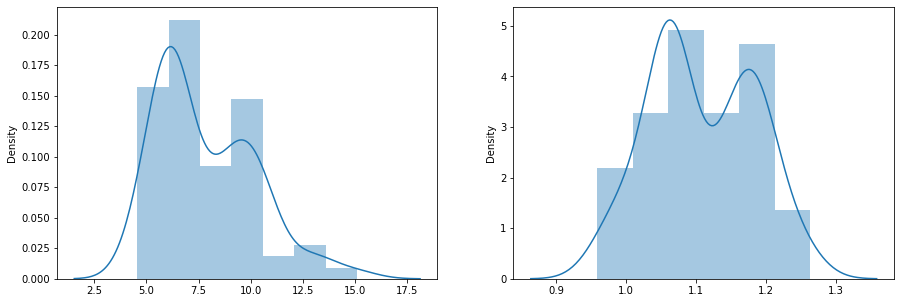

In [20]:
from scipy import stats
x = train_df['Доходность ОФЗ по сроку до 1 года']
xx, k = stats.boxcox(x)
yy = train_df['Прирост вкладов физических лиц в рублях (млн руб)']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(ax = axes[0],
                        x = x);
sns.distplot(ax = axes[1],
             a = xx);
print('Coef_corr до преобразования = ', np.corrcoef(x=x, y = yy)[1,0]);
print('Coef_corr после преобразования = ', np.corrcoef(x=xx, y = yy)[1,0]);

Coef_corr до преобразования =  0.04894577331196063
Coef_corr после преобразования =  0.0871496637101816


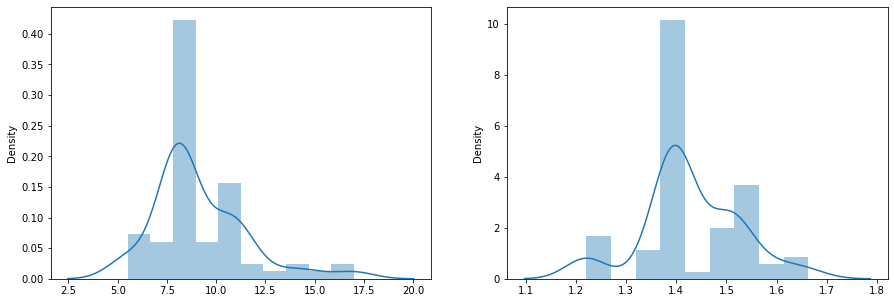

In [21]:
x = train_df['Ключевая ставка']
xx, k = stats.boxcox(x)
yy = train_df['Прирост вкладов физических лиц в рублях (млн руб)']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(ax = axes[0],
                        x = x);
sns.distplot(ax = axes[1],
             a = xx);
print('Coef_corr до преобразования = ', np.corrcoef(x=x, y = yy)[1,0]);
print('Coef_corr после преобразования = ', np.corrcoef(x=xx, y = yy)[1,0]);

Coef_corr до преобразования =  -0.012822900057456439
Coef_corr после преобразования =  -0.021978589275067753


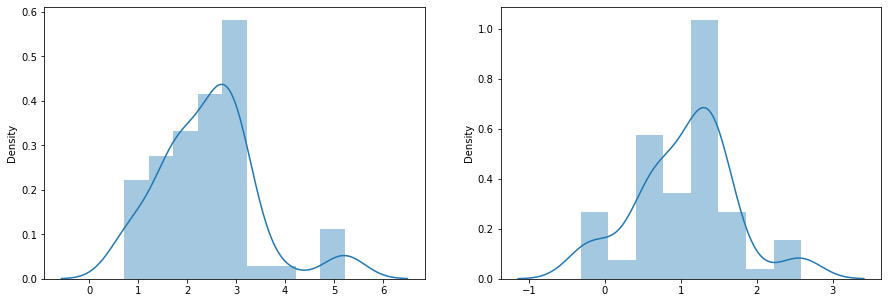

In [22]:
x = train_df['Ставка по вкладам в долларах до 1 года']
xx, k = stats.boxcox(x)
yy = train_df['Прирост вкладов физических лиц в рублях (млн руб)']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(ax = axes[0],
                        x = x);
sns.distplot(ax = axes[1],
             a = xx);
print('Coef_corr до преобразования = ', np.corrcoef(x=x, y = yy)[1,0]);
print('Coef_corr после преобразования = ', np.corrcoef(x=xx, y = yy)[1,0]);

Coef_corr до преобразования =  0.05398919439518859
Coef_corr после преобразования =  0.10732824892603342


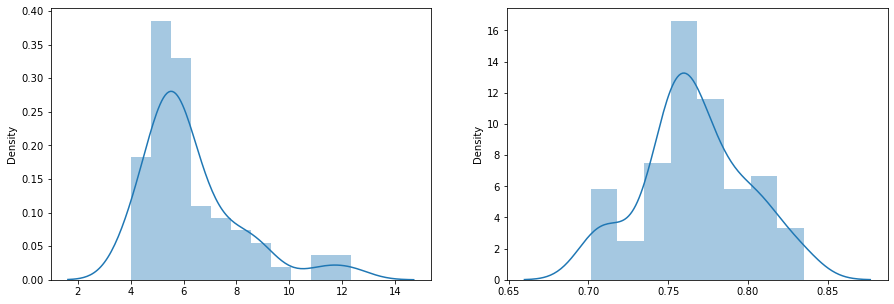

In [23]:
x = train_df['Ставка по вкладам в рублях до\xa01\xa0года']
xx, k = stats.boxcox(x)
yy = train_df['Прирост вкладов физических лиц в рублях (млн руб)']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(ax = axes[0],
                        x = x);
sns.distplot(ax = axes[1],
             a = xx);
print('Coef_corr до преобразования = ', np.corrcoef(x=x, y = yy)[1,0]);
print('Coef_corr после преобразования = ', np.corrcoef(x=xx, y = yy)[1,0]);

Coef_corr до преобразования =  -0.0770736486493974
Coef_corr после преобразования =  -0.07419281158246552


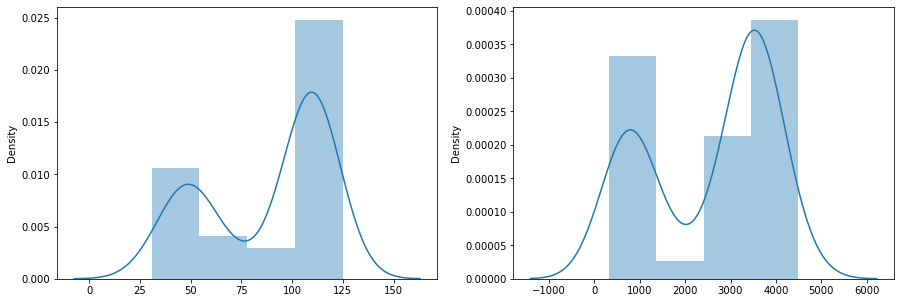

In [24]:
x = train_df['Нефть марки Юралс, долл./барр']
xx, k = stats.boxcox(x)
yy = train_df['Прирост вкладов физических лиц в рублях (млн руб)']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(ax = axes[0],
                        x = x);
sns.distplot(ax = axes[1],
             a = xx);
print('Coef_corr до преобразования = ', np.corrcoef(x=x, y = yy)[1,0]);
print('Coef_corr после преобразования = ', np.corrcoef(x=xx, y = yy)[1,0]);

Coef_corr до преобразования =  0.09869351988162506
Coef_corr после преобразования =  0.07928346428319025


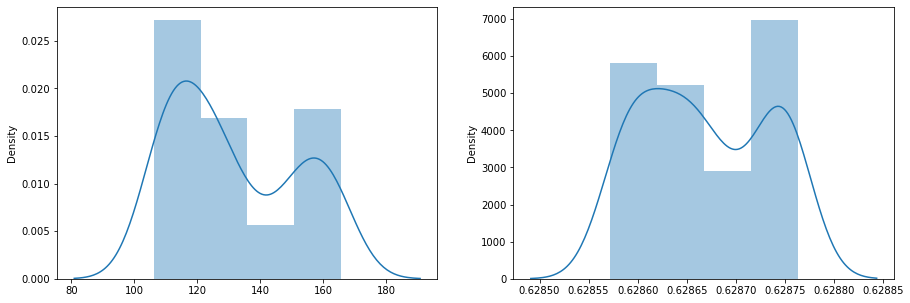

In [25]:
x = train_df['Индекс потребительских цен, ед.']
xx, k = stats.boxcox(x)
yy = train_df['Прирост вкладов физических лиц в рублях (млн руб)']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(ax = axes[0],
                        x = x);
sns.distplot(ax = axes[1],
             a = xx);
print('Coef_corr до преобразования = ', np.corrcoef(x=x, y = yy)[1,0]);
print('Coef_corr после преобразования = ', np.corrcoef(x=xx, y = yy)[1,0]);

Coef_corr до преобразования =  0.16095642813644045
Coef_corr после преобразования =  0.18959507283093244


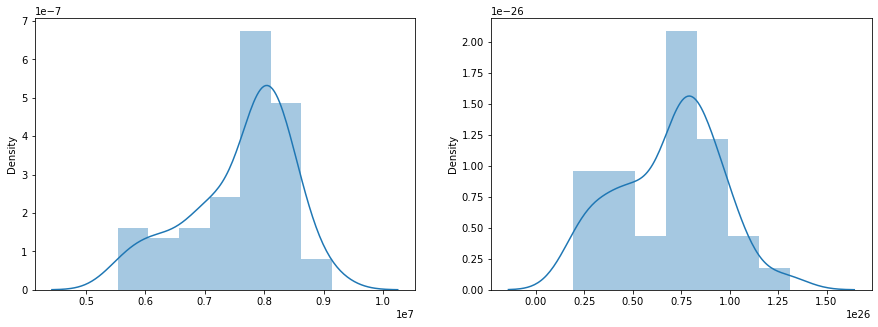

In [26]:
x = train_df['М0, руб']
xx, k = stats.boxcox(x)
yy = train_df['Прирост вкладов физических лиц в рублях (млн руб)']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(ax = axes[0],
                        x = x);
sns.distplot(ax = axes[1],
             a = xx);
print('Coef_corr до преобразования = ', np.corrcoef(x=x, y = yy)[1,0]);
print('Coef_corr после преобразования = ', np.corrcoef(x=xx, y = yy)[1,0]);

Coef_corr до преобразования =  0.13508587949948628
Coef_corr после преобразования =  0.1382968356314418


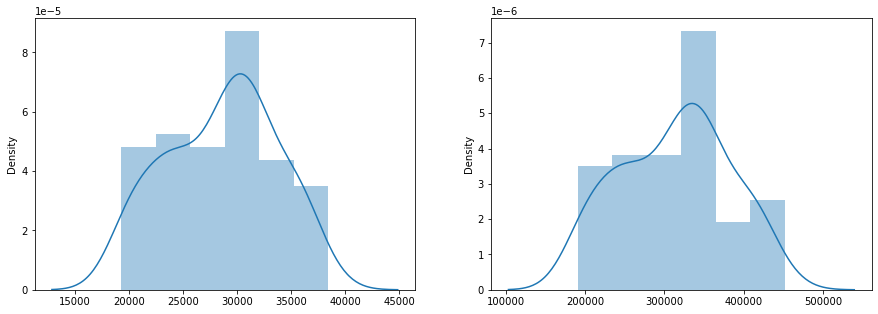

In [27]:
x = train_df['М2, руб']
xx, k = stats.boxcox(x)
yy = train_df['Прирост вкладов физических лиц в рублях (млн руб)']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(ax = axes[0],
                        x = x);
sns.distplot(ax = axes[1],
             a = xx);
print('Coef_corr до преобразования = ', np.corrcoef(x=x, y = yy)[1,0]);
print('Coef_corr после преобразования = ', np.corrcoef(x=xx, y = yy)[1,0]);

Coef_corr до преобразования =  0.0773813091431338
Coef_corr после преобразования =  0.0564124556408745


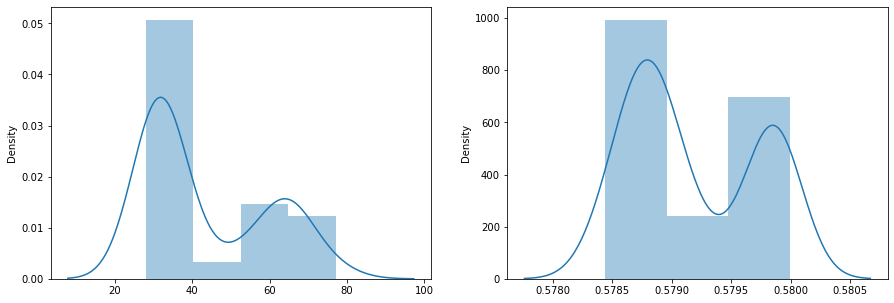

In [28]:
x = train_df['Курс доллара к рублю, руб']
xx, k = stats.boxcox(x)
yy = train_df['Прирост вкладов физических лиц в рублях (млн руб)']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(ax = axes[0],
                        x = x);
sns.distplot(ax = axes[1],
             a = xx);
print('Coef_corr до преобразования = ', np.corrcoef(x=x, y = yy)[1,0]);
print('Coef_corr после преобразования = ', np.corrcoef(x=xx, y = yy)[1,0]);

Coef_corr до преобразования =  0.40529075085317356
Coef_corr после преобразования =  0.37282393109790946


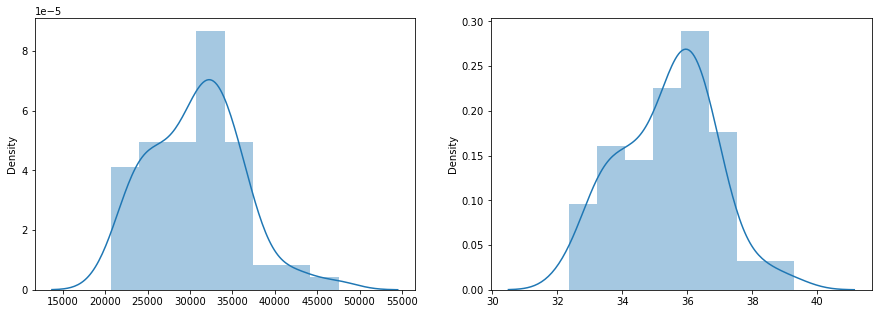

In [29]:
x = train_df['Номинальная средняя з/п, руб']
xx, k = stats.boxcox(x)
yy = train_df['Прирост вкладов физических лиц в рублях (млн руб)']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(ax = axes[0],
                        x = x);
sns.distplot(ax = axes[1],
             a = xx);
print('Coef_corr до преобразования = ', np.corrcoef(x=x, y = yy)[1,0]);
print('Coef_corr после преобразования = ', np.corrcoef(x=xx, y = yy)[1,0]);

По итогу получаем такую ситуацию: распределение независимых переменных нормальным не стало. Мультиколлинеарность между НП. Отсуствие линейной зависимости между ЗП и НП.

### Промежуточный итог

Что мы имеем в итоге. Условия: 

1) Линейность, собственно. Увеличение, или уменьшение вектора независимых переменных в k раз, приводит к изменению зависимой переменной также в k раз;

2) Матрица коэффициентов обладает полным рангом, то есть векторы независимых переменных линейно независимы; 

3) Нормальное распределение. Линейная регрессия сделает более надежные прогнозы, если ваши входные и выходные данные имеют нормальное распределение;

уже нарушены. Эту ситуацию можно связать с малым количеством данных. Все же стоит попробовать использовать линейную регрессию, потому что данных слишком мало и более сложные модели покажут себя еще хуже. 

Давайте ниже это проверим

### Модель

In [69]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler

1) Применим преобразование бокса-кокса

In [72]:
list(df)

['Дата',
 'Прирост вкладов физических лиц в рублях (млн руб)',
 'Доходность ОФЗ по сроку до 1 года',
 'Ключевая ставка',
 'Ставка по вкладам в долларах до 1 года',
 'Ставка по вкладам в рублях до\xa01\xa0года',
 'Нефть марки Юралс, долл./барр',
 'Индекс потребительских цен, ед.',
 'М0, руб',
 'М2, руб',
 'Курс доллара к рублю, руб',
 'Номинальная средняя з/п, руб']

In [74]:
df_reg = pd.DataFrame()
for i in list(df):
    if i in ('Дата', 'Прирост вкладов физических лиц в рублях (млн руб)') :
        df_reg[i] = df[i]
    else:
        df_reg[i] =  stats.boxcox(df[i])[0]

In [77]:
df_reg.head()

,Дата,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
0,2011-01-01,-79049.0,1.155647,1.423465,1.398864,0.702494,90.133245,2.362719,3.861793e+16,4050.837562,1.338790,61.253569
1,2011-02-01,180475.0,1.146653,1.437970,1.513260,0.698654,97.277536,2.364351,4.005456e+16,4090.296896,1.336053,61.263797
2,2011-03-01,106845.0,1.135299,1.437970,1.513260,0.690371,107.026202,2.365646,4.065587e+16,4133.624341,1.332929,63.057193
3,2011-04-01,224890.0,1.088579,1.437970,1.219463,0.685898,115.117853,2.366543,4.469605e+16,4173.443428,1.331687,62.922659
4,2011-05-01,45856.0,1.113273,1.451862,1.219463,0.685898,107.044792,2.367544,4.527444e+16,4197.439172,1.330808,63.149422


Разделим на train_df и test_df

In [78]:
train_df = df[~np.isnan(df['Прирост вкладов физических лиц в рублях (млн руб)'])]
train_df.head()

,Дата,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
0,2011-01-01,-79049.0,5.244667,7.75,2.9,4.5,96.29,106.17151,5532900.0,19307.7,30.08,20669
1,2011-02-01,180475.0,5.144211,8.00,3.1,4.4,103.96,106.99964,5613700.0,19536.7,29.29,20680
2,2011-03-01,106845.0,5.021364,8.00,3.1,4.2,114.44,107.66304,5647000.0,19788.7,28.43,22673
3,2011-04-01,224890.0,4.558571,8.00,2.6,4.1,123.15,108.12599,5863400.0,20020.8,28.10,22519
4,2011-05-01,45856.0,4.795000,8.25,2.6,4.1,114.46,108.64500,5893400.0,20160.9,27.87,22779


In [79]:
test_df = df[np.isnan(df['Прирост вкладов физических лиц в рублях (млн руб)'])]
test_df.head()

,Дата,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
72,2017-01-01,NaN,8.416190,10.00,0.79,6.50,54.89,166.43472,8628900.0,38016.8,59.96,34422
73,2017-02-01,NaN,8.830526,10.00,0.77,6.30,55.49,166.80087,8711600.0,38475.2,58.39,35497
74,2017-03-01,NaN,8.987727,9.75,0.80,5.91,51.97,167.01772,8697700.0,38555.2,58.10,37899
75,2017-04-01,NaN,8.655263,9.75,0.52,6.25,53.06,167.56887,8936600.0,38663.8,56.43,39225
76,2017-05-01,NaN,8.319500,9.25,0.76,6.10,50.87,168.18888,8907000.0,39222.9,57.17,39679


In [240]:
X_train, X_test, y_train, y_test = train_test_split(
                 train_df.drop(columns = ['Дата', 'Прирост вкладов физических лиц в рублях (млн руб)', 'Ставка по вкладам в долларах до 1 года'
                                         ,'Индекс потребительских цен, ед.']),
                 train_df['Прирост вкладов физических лиц в рублях (млн руб)'],
                 test_size= 0.15)

Данные функции прогоняют результаты по различным метрикам, а так же строят 
график scatter для предсказаного y и реального y , график распределения 
непрогназируемой ошибки регрессии.

In [241]:
def print_evaluate(true, predicted):  
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    sns.scatterplot(ax = axes[0], x = predicted, y = true);
    
    sns.distplot(ax = axes[1], a = (predicted - true));
    
    
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

##### Linear regression + RidgeCV + LassoCV

In [242]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)



###### Linear regression

MAE: 87926.1561616276
MSE: 11344999938.159727
RMSE: 106512.9097253461
R2 Square 0.8025256329966831
__________________________________


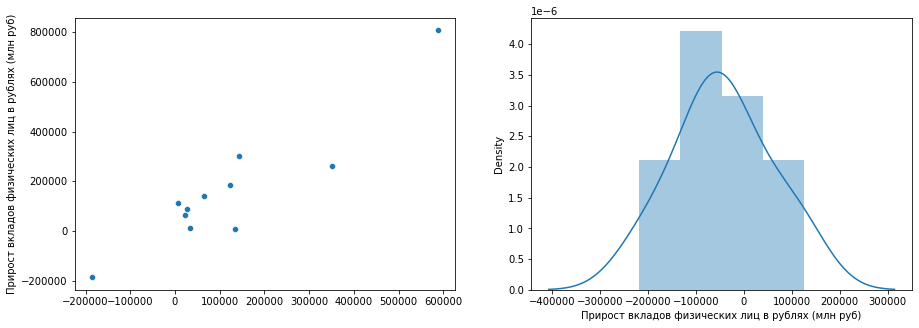

In [302]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)
print_evaluate(y_test, y_pred)

Очень не плохой результат. Причем даже ошибки распределились практически нормально.

In [304]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, y_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,87926.156162,1.134500e+10,106512.909725,0.802526


###### Ridge

MAE: 110171.09321094863
MSE: 27115112356.497757
RMSE: 164666.67044820503
R2 Square 0.5280264717487719
__________________________________


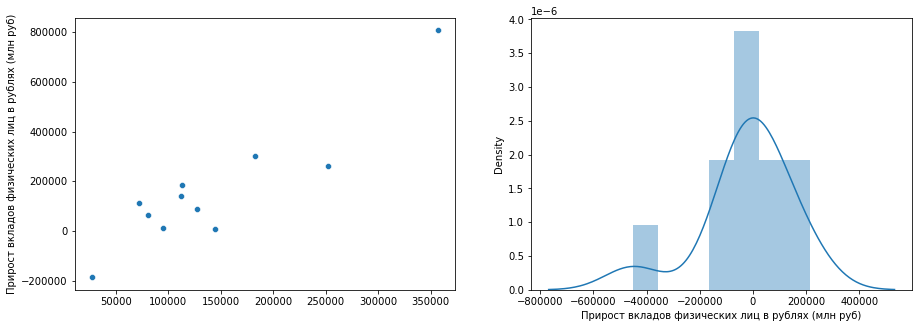

In [306]:
ridge = RidgeCV(cv=10)
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
print_evaluate(y_test, y_pred)

In [307]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, y_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,87926.156162,1.134500e+10,106512.909725,0.802526
1,Ridge Regression,110171.093211,2.711511e+10,164666.670448,0.528026


###### Lasso

MAE: 102064.01998124308
MSE: 18589177564.32433
RMSE: 136342.1342224198
R2 Square 0.6764313712968903
__________________________________


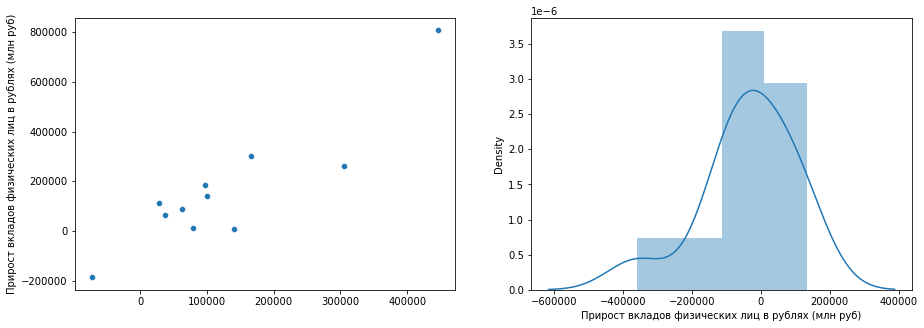

In [308]:
lasso = LassoCV(cv=10)
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
print_evaluate(y_test, y_pred)

In [309]:
results_df_3 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, y_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_3, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,87926.156162,1.134500e+10,106512.909725,0.802526
1,Ridge Regression,110171.093211,2.711511e+10,164666.670448,0.528026
2,Lasso Regression,102064.019981,1.858918e+10,136342.134222,0.676431


In [310]:
# pd.DataFrame({'Coef' : lasso.coef_, 
#               'X' : list(X_train)}).sort_values(by = 'Coef', ascending=False)

##### Нелинейные модели

###### Tree

MAE: 129868.88755980865
MSE: 38849333540.79273
RMSE: 197102.3428089903
R2 Square 0.32377720658558173
__________________________________


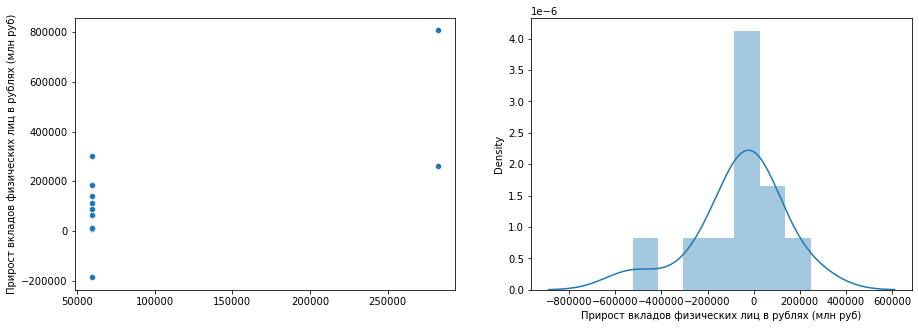

In [312]:
tree = DecisionTreeRegressor()
param = {'max_depth' : np.arange(1,20,1),
         'min_samples_split' : np.arange(2,10,1),
         'min_samples_leaf'  : np.arange(1,10,1)}
grid_search = GridSearchCV(tree, param , n_jobs=-1, cv = 10)
grid_search.fit(X_train, y_train)
best = grid_search.best_estimator_
y_pred_ = best.predict(X_test)
print_evaluate(y_test, y_pred_)

In [320]:
results_df_3 = pd.DataFrame(data=[["Tree", *evaluate(y_test, y_pred_)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_3, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,87926.156162,1.134500e+10,106512.909725,0.802526
1,Ridge Regression,110171.093211,2.711511e+10,164666.670448,0.528026
2,Lasso Regression,102064.019981,1.858918e+10,136342.134222,0.676431
3,Tree,129868.887560,3.884933e+10,197102.342809,0.323777


In [319]:
# results_df = results_df.drop(results_df[results_df.Model == 'Tree'].index)

###### Forest

MAE: 147572.5945454545
MSE: 46152105425.65393
RMSE: 214830.41084924157
R2 Square 0.1966630361851095
__________________________________


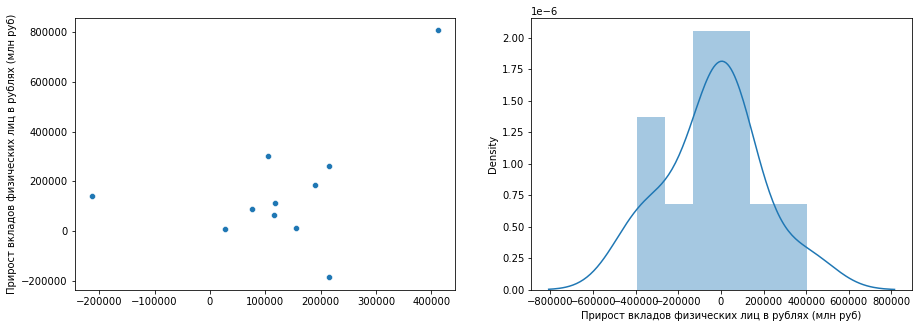

In [327]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred_ = forest.predict(X_test)
print_evaluate(y_test, y_pred_)

In [331]:
results_df_3 = pd.DataFrame(data=[["Forest", *evaluate(y_test, y_pred_)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_3, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,87926.156162,1.134500e+10,106512.909725,0.802526
1,Ridge Regression,110171.093211,2.711511e+10,164666.670448,0.528026
2,Lasso Regression,102064.019981,1.858918e+10,136342.134222,0.676431
3,Tree,129868.887560,3.884933e+10,197102.342809,0.323777
4,Forest,179567.601399,6.885166e+10,262396.006019,-0.198452


###### KNN

MAE: 179567.6013986014
MSE: 68851663974.54062
RMSE: 262396.0060186523
R2 Square -0.19845207885500993
__________________________________


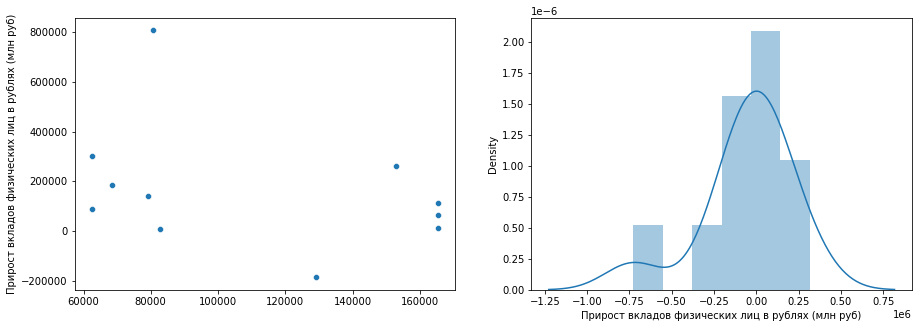

In [330]:
knn = KNeighborsRegressor(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred_ = knn.predict(X_test)
print_evaluate(y_test, y_pred_)

In [332]:
results_df_3 = pd.DataFrame(data=[["KNN", *evaluate(y_test, y_pred_)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_3, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,87926.156162,1.134500e+10,106512.909725,0.802526
1,Ridge Regression,110171.093211,2.711511e+10,164666.670448,0.528026
2,Lasso Regression,102064.019981,1.858918e+10,136342.134222,0.676431
3,Tree,129868.887560,3.884933e+10,197102.342809,0.323777
4,Forest,179567.601399,6.885166e+10,262396.006019,-0.198452
5,KNN,179567.601399,6.885166e+10,262396.006019,-0.198452


In [338]:
results_df.sort_values(by = 'R2 Square', ascending=False)

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,87926.156162,1.134500e+10,106512.909725,0.802526
2,Lasso Regression,102064.019981,1.858918e+10,136342.134222,0.676431
1,Ridge Regression,110171.093211,2.711511e+10,164666.670448,0.528026
3,Tree,129868.887560,3.884933e+10,197102.342809,0.323777
4,Forest,179567.601399,6.885166e+10,262396.006019,-0.198452
5,KNN,179567.601399,6.885166e+10,262396.006019,-0.198452


Линейная регрессия действительно справилась лучше всех.

### Посмотрим на коэффициенты линейной регрессии

In [346]:
lin_reg.intercept_

143600.19672131137

In [344]:
pd.DataFrame({'X' : list(X_train), 'Coef' : lin_reg.coef_}).sort_values(by = 'Coef', ascending = False)

,X,Coef
7,"Номинальная средняя з/п, руб",479243.931404
3,"Нефть марки Юралс, долл./барр",170889.123146
6,"Курс доллара к рублю, руб",151543.109874
2,Ставка по вкладам в рублях до 1 года,47083.243201
1,Ключевая ставка,-11795.289374
5,"М2, руб",-70752.586815
0,Доходность ОФЗ по сроку до 1 года,-74256.077052
4,"М0, руб",-295607.112566


Intercept равен 143600.197 - это зависимой переменной, если занулить все регрессоры. Данное значение не плохо вписывается в общую картину данных. \
Как видим по коэффициентам, наибольшее влияние имеет "номинальная средняя з/п,руб", что имеет смысл.

### Поработает с ошибками регрессии

###### 1) Распределение ошибок

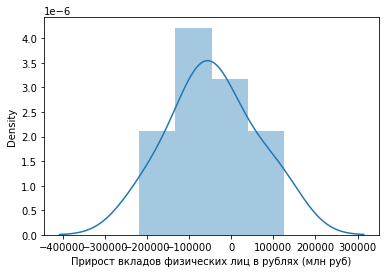

In [350]:
sns.distplot(a = (lin_reg.predict(X_test_scaled) - y_test));

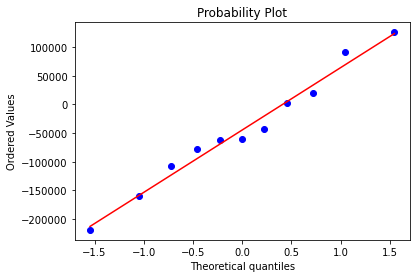

In [353]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = lin_reg.predict(X_test_scaled) - y_test
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

Ошибки распределены практически нормально

###### 2) Математическое ожидание ошибок

In [359]:
np.mean(lin_reg.predict(X_test_scaled) - y_test)

-44528.61517507828

В рамках данной задачи это не слишком сильное отклонение. Да , к сожалению оценки модели у нас смещены.

###### 3) Гомоскедастичность ошибок

<AxesSubplot:ylabel='Прирост вкладов физических лиц в рублях (млн руб)'>

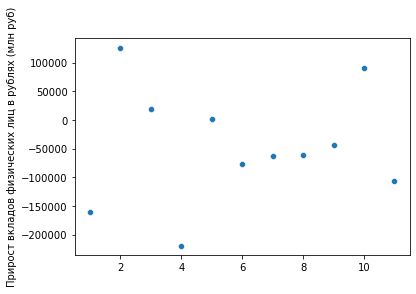

In [364]:
errors = lin_reg.predict(X_test_scaled) - y_test
k = np.arange(1,len(errors)+1,1)
sns.scatterplot(x = k, y = errors)

Ошибки гетероскедастичны

### Результат и итоги

Подведем итоги:

1) Данных крайне мало. Провести нормальную валидацию нереально.

2) Линейная регрессия, даже при не выполнении условий , справляется лучше всего с данной задачей.

3) Ошибки регрессии распределились практически нормально именно в модели линейной регрессии.

4) Не большое отклонение математического ожидания от ошибок регрессии присуствует.

5) Присуствует гетероскедастичность

6) Независимые переменные я выбирал при помощи LassoCV, так как LassoСV зануляет некоторые переменные. Поэтому я исключил 
   'Ставка по вкладам в долларах до 1 года' , 'Индекс потребительских цен, ед'. Исключение данных полей принесло наилучший    результат.

In [280]:
test_df_scale = scale.transform(test_df.drop(columns = ['Дата', 'Прирост вкладов физических лиц в рублях (млн руб)', 
                                                        'Ставка по вкладам в долларах до 1 года'
                                                         ,'Индекс потребительских цен, ед.']))

In [281]:
result_pred = lin_reg.predict(test_df_scale)

In [283]:
result_pred

array([-48280.87301921, -20810.54809758, 149059.6110404 , 194158.38577876,
       239160.02920954, 316449.01634887,  35154.94849567, -29883.47718451,
        38382.65673158,  74632.09120796, 133747.19515642, 894762.34610294])

In [284]:
submission = pd.DataFrame({'Дата' : test_df['Дата'],
                           'Прирост вкладов физических лиц в рублях (млн руб)' : result_pred})

In [285]:
submission

,Дата,Прирост вкладов физических лиц в рублях (млн руб)
72,2017-01-01,-48280.873019
73,2017-02-01,-20810.548098
74,2017-03-01,149059.611040
75,2017-04-01,194158.385779
76,2017-05-01,239160.029210
77,2017-06-01,316449.016349
78,2017-07-01,35154.948496
79,2017-08-01,-29883.477185
80,2017-09-01,38382.656732
81,2017-10-01,74632.091208


In [288]:
submission.to_csv('BST/submission.csv', index=False)